In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
abc = pd.read_csv('abc_company.csv', encoding='latin-1')
print(abc.head())


            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25  06-Feb     180   
1    Jae Crowder  Boston Celtics      99       SF   25  06-Jun     235   
2   John Holland  Boston Celtics      30       SG   27  06-May     205   
3    R.J. Hunter  Boston Celtics      28       SG   22  06-May     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29  06-Oct     231   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0  


In [26]:
for col in abc.columns:
    print(col)

Name
Team
Number
Position
Age
Height
Weight
College
Salary


# Preprocessing:
Correct the data in the "height" column by replacing it with random numbers between 150 and 180. 
Ensure data consistency and integrity before proceeding with analysis. (1 mark)


In [81]:
abc = pd.read_csv('abc_company.csv', encoding='latin-1') # load the dataset

print("Original DataFrame:")
print(abc.head())

if 'Height' in abc.columns:              # REPLACE Height btwn 150 and 180
    abc['Height'] = np.random.randint(150, 181, size=len(abc)) # (size=len(abc)) used for generate specific number of random integers.
else:
    print("Column 'height' does not exist in the dataset.")

print("\nDataFrame after preprocessing:")
print(abc.head())

abc.to_csv('abc_company_cleaned.csv', index=False)  # saved to new csv file
print("\nCleaned dataset saved as 'abc_company_cleaned.csv'.")


Original DataFrame:
            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25  06-Feb     180   
1    Jae Crowder  Boston Celtics      99       SF   25  06-Jun     235   
2   John Holland  Boston Celtics      30       SG   27  06-May     205   
3    R.J. Hunter  Boston Celtics      28       SG   22  06-May     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29  06-Oct     231   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0  

DataFrame after preprocessing:
            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25     175     180   
1    Jae Crowder  Boston Celtics      99       SF   25     158     235   
2   John Holland  Boston Celtics      30       SG   27     169     205   
3  

# Analysis Tasks:
1. Determine the distribution of employees across each team and calculate the 
percentage split relative to the total number of employees. (2 marks)

In [36]:

abc = pd.read_csv('abc_company_cleaned.csv') #READ

team_count = abc['Team'].value_counts() # number of employees in each team

team_percentage = (team_count / len(abc)) * 100 # percentage split for each team

print("Number of employees in each team:")
print(team_count)
print("\nPercentage of employees in each team:")
print(team_percentage)


Number of employees in each team:
Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

Percentage of employees in each team:
Team
New Orleans Pelicans 

# Graphical Representation

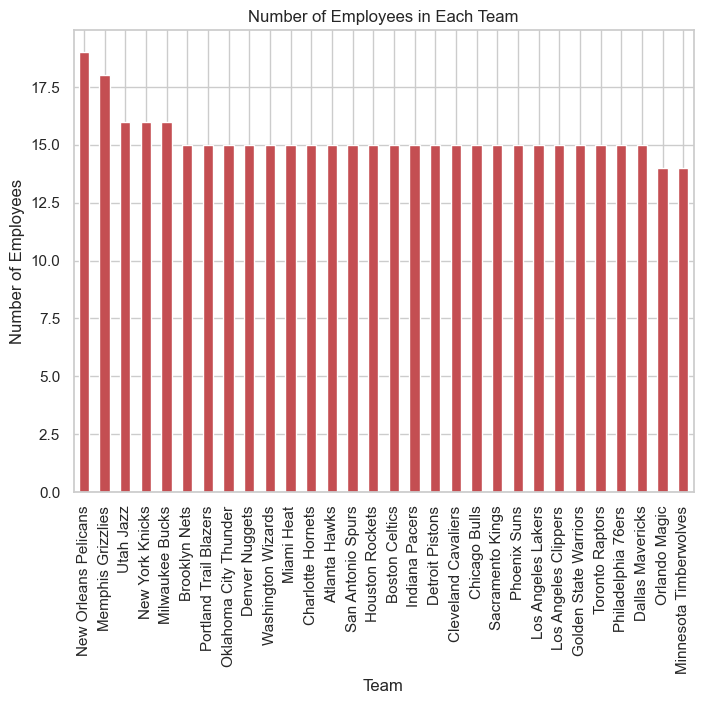

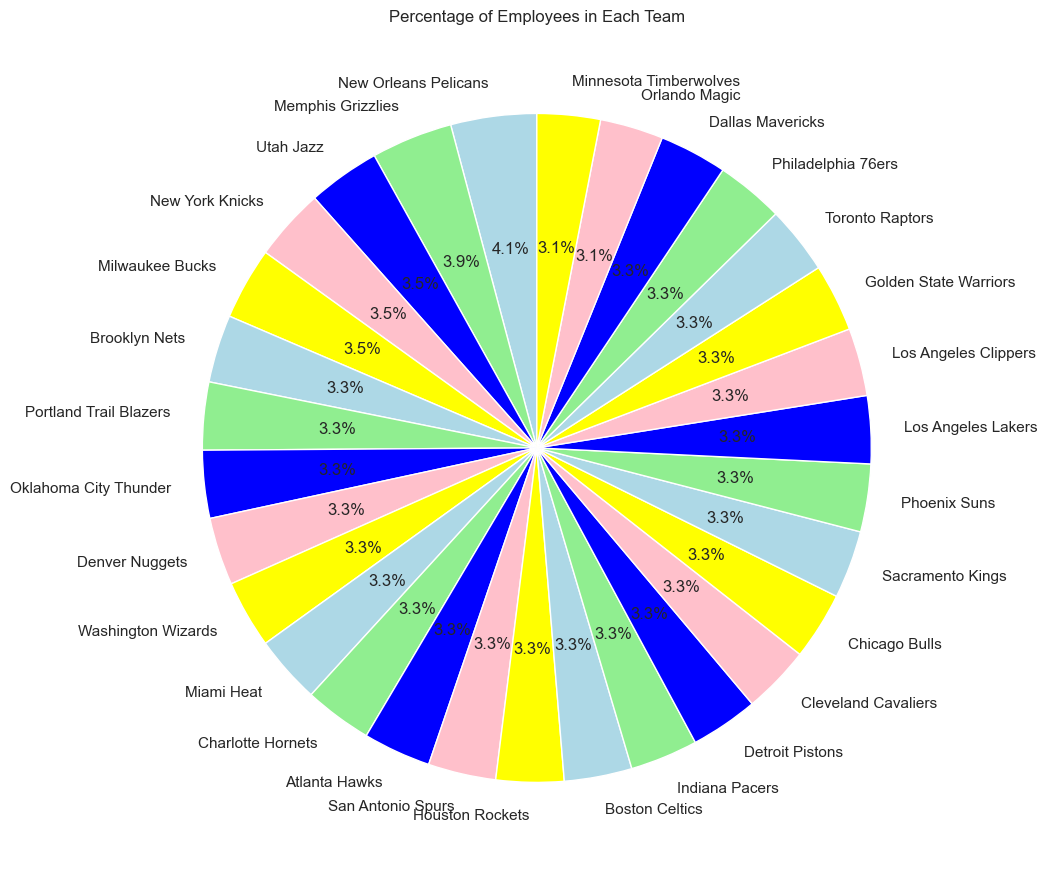

In [109]:
# 1ST CHART: Bar chart - number of employees in each team
plt.figure(figsize=(8, 6), dpi=100)
team_count.plot(kind='bar', color='r')
plt.title("Number of Employees in Each Team")
plt.xlabel("Team")
plt.ylabel("Number of Employees")
plt.grid(True, axis ='y')
plt.show()

# 2ND CHART : Pie chart - percentage split of employees in each team
plt.figure(figsize=(10, 9), dpi=100)
team_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'blue', 'pink', 'yellow'])
plt.title("Percentage of Employees in Each Team")
plt.ylabel('') # Removes default y label
plt.tight_layout() # to avoid overlapping
plt.show()

# 2. Segregate employees based on their positions within the company. (2 marks)

In [95]:

abc = pd.read_csv('abc_company_cleaned.csv')

position_count = abc['Position'].value_counts()
print("Number of employees in each position:")
print(position_count)



Number of employees in each position:
Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


# Graphical Representation

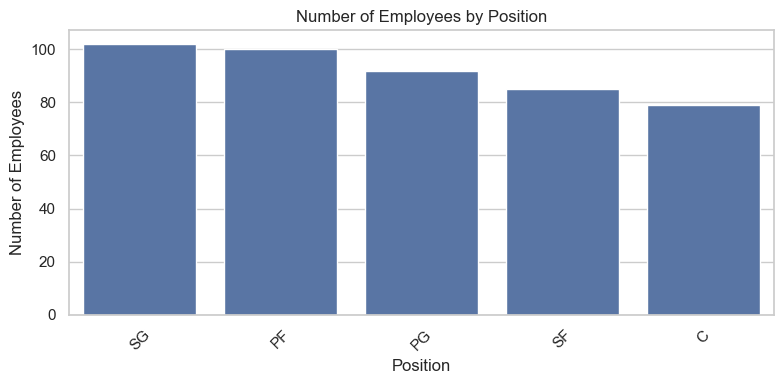

In [103]:

plt.figure(figsize=(8, 4), dpi =100)  # Increase figure size for clarity
sns.barplot(x=position_count.index, y=position_count.values)

plt.title('Number of Employees by Position')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.grid(True,axis='y')

plt.xticks(rotation=45) # to avoid overlap rotate xaxis
plt.tight_layout()  # to avoid label overlapping
plt.show()


# 3. Identify the predominant age group among employees. (2 marks)

In [125]:

abc = pd.read_csv('abc_company_cleaned.csv')

bins = [20, 30, 40, 50, 60, 70]  # Age ranges (20-30, 30-40, etc.)
labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
abc['Age Group'] = pd.cut(abc['Age'], bins=bins, labels=labels)

age_group_count = abc['Age Group'].value_counts().sort_index()

print("Number of employees in each age group:")
print(age_group_count)


Number of employees in each age group:
Age Group
20-30    346
30-40     91
40-50      0
50-60      0
60-70      0
Name: count, dtype: int64


# Graphical Representation

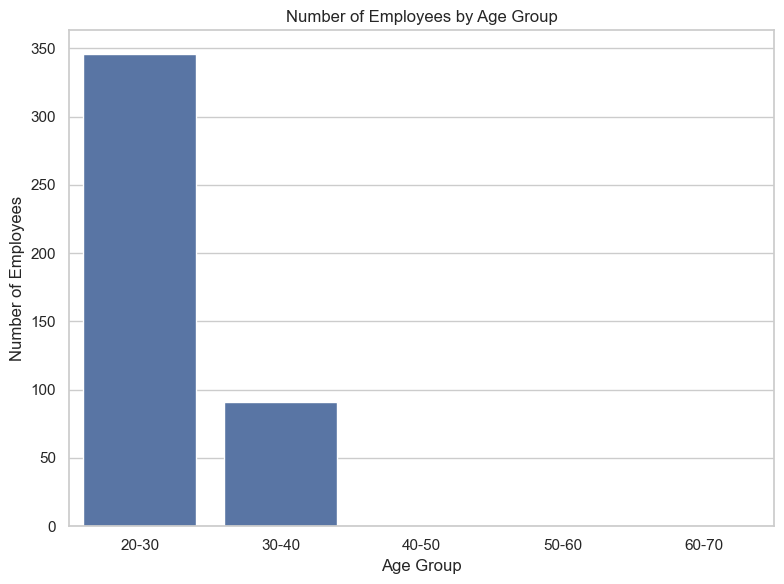

In [127]:

plt.figure(figsize=(8, 6)) # no of emp in each age group
sns.barplot(x=age_group_count.index, y=age_group_count.values)

plt.title('Number of Employees by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.grid(True,axis='y')

plt.tight_layout()  # Adjusted layout
plt.show()

# 4. Discover which team and position have the highest salary expenditure. (2 marks)

In [67]:

abc = pd.read_csv('abc_company_cleaned.csv')

salary_exp = abc.groupby(['Team', 'Position'])['Salary'].sum().unstack()
# (unstack() used to transform grouped data to table format, making it easier to plot with teams = rows and positions = columns.)

max_salary_exp = salary_exp.stack().idxmax() 
highest_salary = salary_exp.stack().max()   

print(f"The team and position with the highest salary expenditure is: {max_salary_exp}")
print(f"Total salary expenditure for this team and position: {highest_salary}")

The team and position with the highest salary expenditure is: ('Los Angeles Lakers', 'SF')
Total salary expenditure for this team and position: 31866445.0


# Graphical Representation

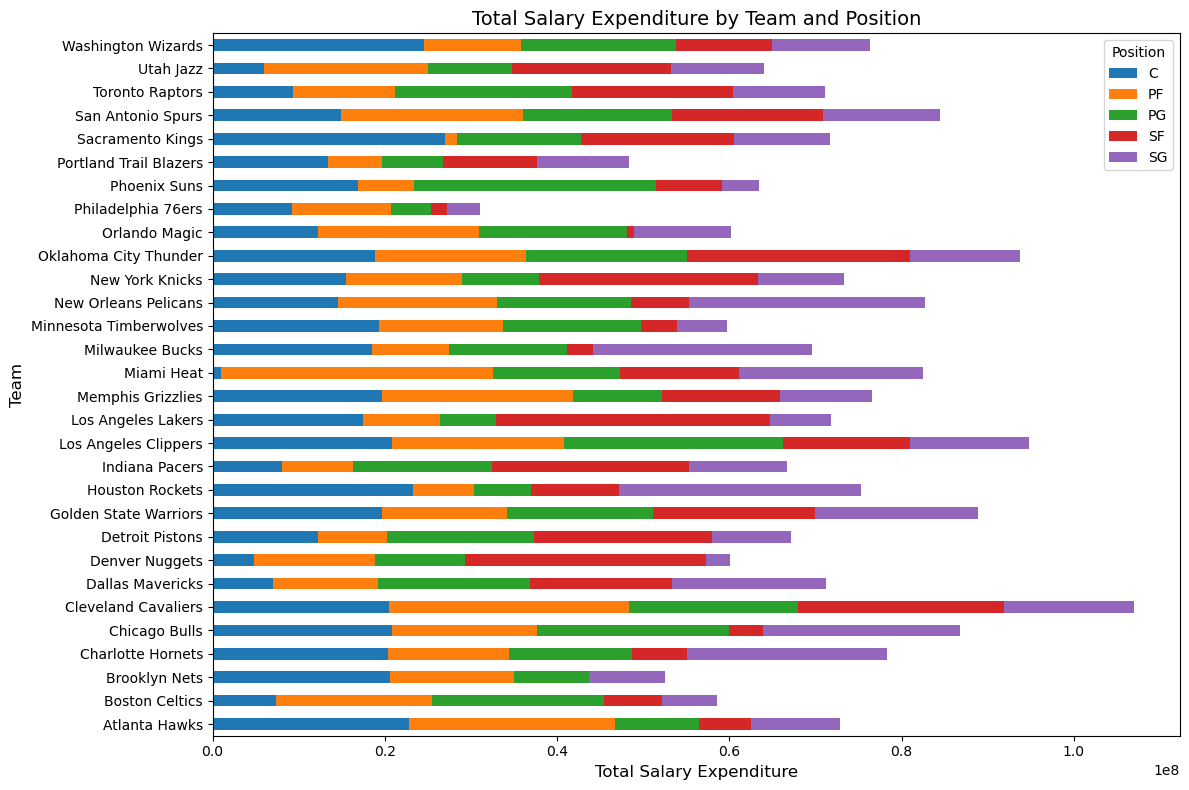

In [69]:
salary_exp.plot(kind='barh', stacked=True, figsize=(12, 8)) 
# (kind='barh', stacked=True automatically assign default color)

plt.title('Total Salary Expenditure by Team and Position', fontsize=14)
plt.xlabel('Total Salary Expenditure', fontsize=12)
plt.ylabel('Team', fontsize=12)

plt.tight_layout()

plt.show()

# 5. Investigate if there's any correlation between age and salary, and represent it visually. (2 marks)

In [77]:

abc = pd.read_csv('abc_company_cleaned.csv')

correlation = abc[['Age', 'Salary']].corr()

print("Correlation between Age and Salary:")
print(correlation)


Correlation between Age and Salary:
             Age    Salary
Age     1.000000  0.214009
Salary  0.214009  1.000000


# Graphical Representation

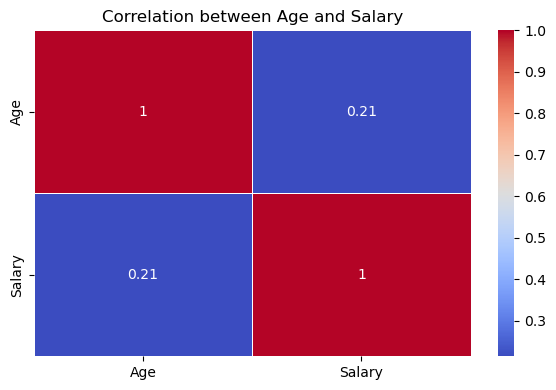

In [79]:

plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation between Age and Salary')

plt.tight_layout()
plt.show()
